## Imports

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Load & Split Dataset

In [2]:
iris = datasets.load_iris()
print("Iris Data\n",list(iris.keys()))
X = iris.data[:, :2] # we only take the first two features.
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0
print(y)
# Split into a train and test partition.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=0)

Iris Data
 ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


<br>
<br>

## Exercise 1. - Logistic Regression with Scikit Learning

In [3]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

train_predict = log_reg.predict(X_train[:len(y_train), :])
test_predict = log_reg.predict(X_test[:len(y_test), :])
print("Predict (train):", train_predict)
print("Predict (test):", test_predict)

Predict (train): [1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1
 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0
 0 1 0 0 0 1 0 1 0]
Predict (test): [0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Accuracy using SKLearn

In [4]:
print("Actual (train):",y_train)
print("Actual (test):",y_test)

# Using SKLearn
print("Train Accuracy:",accuracy_score(y_train, train_predict))
print("Test Accuracy:",accuracy_score(y_test, test_predict))

Actual (train): [1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 1 0]
Actual (test): [1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0]
Train Accuracy: 0.8333333333333334
Test Accuracy: 0.7


### Accuracy without using SKLearn

In [5]:
def accuracy(real, prediction):
    #Accuracy = (TP+TN) / (TP+TN+FP+FN) ; Alternatively: #Equal values / #Size of arrays
    return np.sum(real == prediction) / len(real)

In [6]:
print("Actual (train):",y_train)
print("Actual (test):",y_test)

# Without using SKLearn
print("Train Accuracy:",accuracy(y_train, train_predict))
print("Test Accuracy:",accuracy(y_test, test_predict))

Actual (train): [1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 1 0]
Actual (test): [1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0]
Train Accuracy: 0.8333333333333334
Test Accuracy: 0.7


<br>
<br>

## Exercise 2. - Perceptron with Numpy

### a)

In [7]:
# Activation Functions
def linear_activation(x, w):
    predict = w.T @ x
    return predict
    #return 1.0 if predict >= 0.0 else 0.0

def sigmoid_activation(x, w):
    z = linear_activation(x,w)
    predict = np.exp(z) / (1 + np.exp(z))
    return predict
    #return 1.0 if predict >= 0.0 else 0.0

#i
def lr_se_linear(x, y, w, niu, max_epochs = 10000):
    num_epochs = 0
    errors = []

    while(True):
        if(num_epochs >= max_epochs): break
            
        num_epochs += 1
        changed = False
        err_cum = 0
        #print("epoch: ", num_epochs)
        
        for i in range(len(x)):
            dp = np.insert(x[i], 0, 1, axis=0) # Data Point (add bias)
            
            # 1. Compute output - activation function
            o = linear_activation(dp, w)
                
            #print("   y: ", y[i])
            #print("   o: ", o)

            # 2. Compute error: niu (y - o) * x
            delta = (y[i] - o)
            err_cum += abs(delta)
            
            if(abs(delta) < 1e-5): continue

            # 3. Update weights
            w = w + np.reshape((niu * delta * dp), w.shape)
            
            #print("   w: ",w)
            
            changed = True
            
        errors.append(err_cum)
        
        if(not changed): break
            
    return (w, num_epochs, errors)

#ii
def lr_se_sigmoid(x, y, w, niu, max_epochs = 10000):
    num_epochs = 0
    errors = []

    while(True):
        if(num_epochs >= max_epochs): break
            
        num_epochs += 1
        changed = False
        err_cum = 0
        #print("epoch: ", num_epochs)
        
        for i in range(len(x)):
            dp = np.insert(x[i], 0, 1, axis=0) # Data Point (add bias)
            
            # 1. Compute output - activation function
            o = sigmoid_activation(dp, w)
                
            #print("   y: ", y[i])
            #print("   o: ", o)

            # 2. Compute error: niu (y - o) * x
            delta = (y[i] - o)
            err_cum += abs(delta)
            
            if(abs(delta) < 1e-5): continue

            # 3. Update weights
            w = w + np.reshape((niu * delta * dp), w.shape)
            
            #print("   w: ",w)
            
            changed = True
            
        errors.append(err_cum)
        
        if(not changed): break
            
    return (w, num_epochs, errors)

#iii - TODO
def lr_ce_sigmoid(x, y, w, niu, max_epochs = 1000):
    return

In [28]:
#hw_x = np.arange(0,10).reshape(-1,1)
#t = np.arange(0,10) * 2 + 1
#niu = 0.01
#w = np.array([[1,1]]).T
#result = lr_se_linear(hw_x, t, w, niu)

## i.
result = lr_se_linear(X_train, y_train, np.array([[1, 1, 1]]).T, 0.01)

print(result[0])
print(result[1])

plt.plot(result[2])


## ii.
result = lr_se_sigmoid(X_train, y_train, np.array([[1, 1, 1]]).T, 0.01)

print(result[0])
print(result[1])

plt.plot(result[2])

KeyboardInterrupt: 

### b)

Squared Error + Linear Activation
Experiment  0
[[-1.78470435]
 [ 0.38405496]
 [-0.0279618 ]]
1000

Experiment  1
[[-1.78470444]
 [ 0.38405497]
 [-0.02796178]]
1000

Experiment  2
[[-1.78470463]
 [ 0.38405498]
 [-0.02796175]]
1000



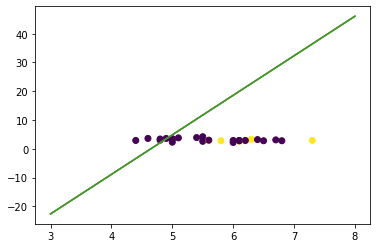

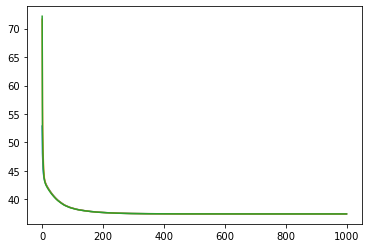

In [57]:
lr = 0.01

plt.figure(0)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)


## i.
print("Squared Error + Linear Activation")
for i in range(3):
    weights = np.random.rand(3,1)
    #print(weights)
    
    result = lr_se_linear(X_train, y_train, weights, lr, 1000)
    print("Experiment ", i)
    print(result[0])
    print(result[1])
    
    print("")
    
    plt.figure(0)
    domain = np.linspace(3,8,100)
    line = -(result[0][0] * 1 + result[0][1] * domain) / result[0][2]

    plt.plot(domain,line)

    plt.figure(1)
    plt.plot(result[2])

Squared Error + Sigmoid Activation
Experiment  0
[[-11.18109573]
 [  2.34446103]
 [ -1.35786633]]
1000

Experiment  1
[[-11.13635927]
 [  2.33977295]
 [ -1.36301138]]
1000

Experiment  2
[[-11.1997327 ]
 [  2.34641584]
 [ -1.35572602]]
1000



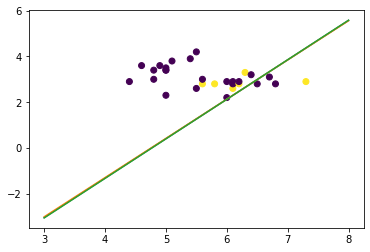

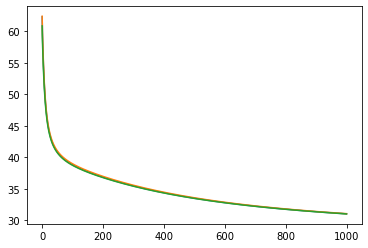

In [59]:
lr = 0.01

plt.figure(0)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)


## ii.
print("Squared Error + Sigmoid Activation")
for i in range(3):
    weights = np.random.rand(3,1)
    #print(weights)
    
    result = lr_se_sigmoid(X_train, y_train, weights, lr, 1000)
    print("Experiment ", i)
    print(result[0])
    print(result[1])
    
    print("")
    
    plt.figure(0)
    domain = np.linspace(3,8,100)
    line = -(result[0][0] * 1 + result[0][1] * domain) / result[0][2]

    plt.plot(domain,line)

    plt.figure(1)
    plt.plot(result[2])

### c)

### d)

In [13]:
def accuracy(real, prediction):
    #Accuracy = (TP+TN) / (TP+TN+FP+FN) ; Alternatively: #Equal values / #Size of arrays
    return np.sum(real == prediction) / len(real)

In [18]:
lr = 0.01

## i.
print("Squared Error + Linear Activation")
weights =  np.array([[1, 1, 1]]).T
    
weights = lr_se_linear(X_train, y_train, weights, lr, 1000)[0]

train_predict = []
for i in range(len(X_train)):
    dp = np.insert(X_train[i], 0, 1, axis=0) # Data Point (add bias)  
    o = linear_activation(dp,weights)
    o = 1.0 if o >= 0.0 else 0.0
    
    train_predict.append(o)
                    
test_predict = []
for i in range(len(X_test)):
    dp = np.insert(X_test[i], 0, 1, axis=0) # Data Point (add bias)        
    o = linear_activation(dp,weights)
    o = 1.0 if o >= 0.0 else 0.0
    
    test_predict.append(o)
                    

print("Train Accuracy:",accuracy(y_train, train_predict))
print("Test Accuracy:",accuracy(y_test, test_predict))

Squared Error + Linear Activation
Train Accuracy: 0.4666666666666667
Test Accuracy: 0.36666666666666664


In [20]:
lr = 0.01

## ii.
print("Squared Error + Sigmoid Activation")
weights =  np.array([[1, 1, 1]]).T
    
weights = lr_se_sigmoid(X_train, y_train, weights, lr, 1000)[0]

train_predict = []
for i in range(len(X_train)):
    dp = np.insert(X_train[i], 0, 1, axis=0) # Data Point (add bias)  
    o = sigmoid_activation(dp,weights)
    o = 1.0 if o >= 0.0 else 0.0
    
    train_predict.append(o)
                    
test_predict = []
for i in range(len(X_test)):
    dp = np.insert(X_test[i], 0, 1, axis=0) # Data Point (add bias)        
    o = sigmoid_activation(dp,weights)
    o = 1.0 if o >= 0.0 else 0.0
    
    test_predict.append(o)
                    

print("Train Accuracy:",accuracy(y_train, train_predict))
print("Test Accuracy:",accuracy(y_test, test_predict))

Squared Error + Sigmoid Activation
Train Accuracy: 0.36666666666666664
Test Accuracy: 0.2


### e)

no